In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
!pip install tensorflow
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
#shape of the numpy array
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training images = 60,000

Test images = 10,000

image dimension -> 28 * 28

In [8]:
print(X_train[50])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  12  56 140 126 175 200  96   2
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  35 166 238 254 246 242 253 246 254  67
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 184 182 146 127  70  30  45  36 215 175
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30   0   0   0   0   0   0   0 207 246
   14   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  5

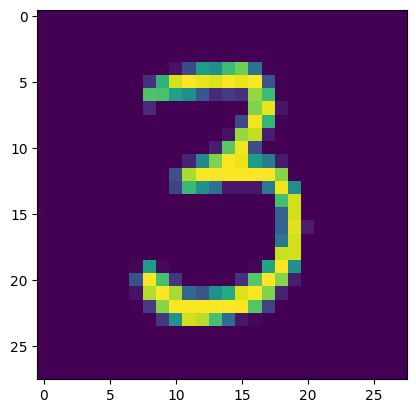

3


In [10]:
# displaying the image
plt.imshow(X_train[50])
plt.show()

#print the corresponding label
print(y_train[50])


Image labels


In [11]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


In [12]:
#unique values in y_train
print(np.unique(y_train))

#unique values in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [13]:
#scaling the values
X_train = X_train/255
X_test = X_test/25

In [14]:
print(X_train[50])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building a Neural Network

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [25]:
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 0.001)
)

In [26]:
model.fit(
    X_train, y_train,
    epochs = 10
)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0074
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0067
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0052
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0072
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0079
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0072
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0077
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0070
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0071
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0055


**Accuracy on Test data**

In [28]:
results = model.evaluate(X_test,y_test)
loss = results
print(loss)

313/313 [==============================] - 1s 3ms/step - loss: 2.0650
2.064981698989868


In [29]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = np.mean(y_pred_classes == y_test)

# Print loss and accuracy
print("Loss:", loss)
print("Accuracy:", accuracy)

313/313 [==============================] - 1s 2ms/step
Loss: 2.064981698989868
Accuracy: 0.9758


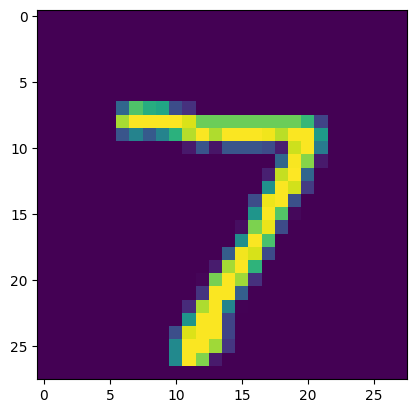

In [30]:
plt.imshow(X_test[0])
plt.show()

In [31]:
print(y_pred_classes[0])

7


In [32]:
print(y_pred_classes)

[7 2 1 ... 4 5 6]


In [33]:
print(y_pred_classes.shape)

(10000,)


In [34]:
con_mat = confusion_matrix(y_test, y_pred_classes)
print(con_mat)

tf.Tensor(
[[ 969    1    1    0    0    1    5    0    1    2]
 [   0 1125    3    1    0    0    3    2    1    0]
 [   2    2 1005   11    1    1    3    4    3    0]
 [   1    0    3  991    0    5    0    6    4    0]
 [   0    1    4    1  952    0    8    1    2   13]
 [   2    0    1   10    0  870    2    1    3    3]
 [   4    4    4    2    3    4  936    0    1    0]
 [   0    3   11    4    1    0    0 1002    2    5]
 [   4    1    8    8    2    8    1    6  933    3]
 [   1    5    0    9   11    2    1    4    1  975]], shape=(10, 10), dtype=int32)


Text(95.72222222222221, 0.5, 'True labels')

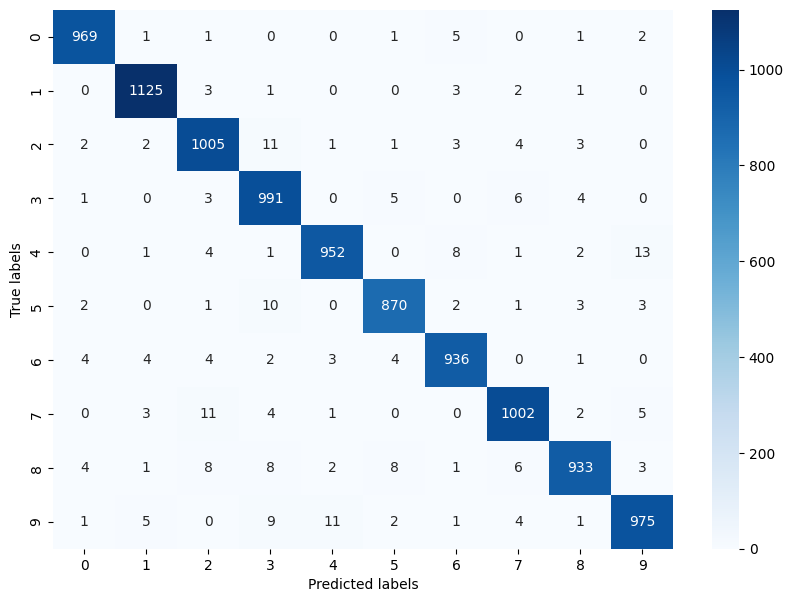

In [35]:
plt.figure(figsize=(10,7))
sns.heatmap(con_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

Building a predictive system

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)